# Advanced Bayesian Inference: MCMC and Hierarchical Models

This notebook explores advanced Bayesian inference techniques including:
- Markov Chain Monte Carlo (MCMC) sampling
- Metropolis-Hastings algorithm
- Gibbs sampling
- Hierarchical Bayesian models
- Model comparison using Bayes factors

## Learning Objectives
1. Understand MCMC sampling methods
2. Implement Metropolis-Hastings algorithm
3. Apply Gibbs sampling to conjugate models
4. Build hierarchical Bayesian models
5. Compare models using Bayesian methods


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import scipy.stats as stats
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 Libraries imported successfully!")
print("Ready for some Bayesian magic! ✨")


🚀 Libraries imported successfully!
Ready for some Bayesian magic! ✨


## 🎯 Example 1: The Monty Hall Problem (Bayesian Style!)

### The Problem
The Monty Hall problem is a famous probability puzzle that stumps even professional mathematicians! Here's the setup:
- You're on a game show with 3 doors
- Behind one door is a car (prize), behind the other two are goats
- You pick a door (say Door 1)
- The host (who knows where the car is) opens another door (say Door 3) showing a goat
- **Question**: Should you stick with your original choice or switch to the remaining door?

### Why This Matters
This problem demonstrates a fundamental concept in Bayesian thinking: **how new information should update our beliefs**. It's not just a math puzzle - it's about how we should make decisions when we receive new information.

### Real-World Relevance
- **Medical Diagnosis**: How test results should change our assessment of disease probability
- **Investment Decisions**: How new market information should update our portfolio choices  
- **Legal Evidence**: How new evidence should change our assessment of guilt/innocence
- **Quality Control**: How new test results should update our assessment of product quality

### The Bayesian Approach
Instead of just calculating probabilities, we'll use Bayes' theorem to show how the host's action provides crucial information that dramatically shifts our probability estimates. This is the essence of Bayesian inference!


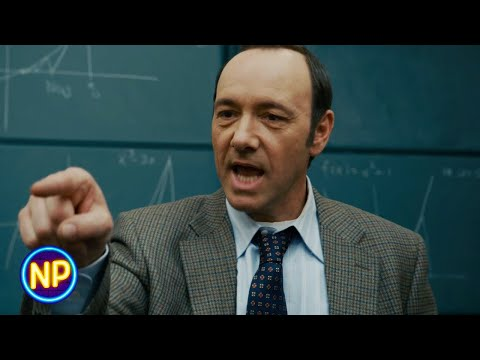

In [7]:
# Let's watch the famous Monty Hall problem in action!
from IPython.display import YouTubeVideo

# Display the YouTube video from the movie "21"
YouTubeVideo("CYyUuIXzGgI", width=800, height=450)


In [2]:
def monty_hall_bayesian():
    """
    Solve the Monty Hall problem using Bayesian inference
    """
    print("🎲 MONTY HALL PROBLEM - BAYESIAN SOLUTION")
    print("=" * 50)
    
    # Prior probabilities (before any door is opened)
    # Initially, each door has equal probability of having the car
    prior_car_door1 = 1/3
    prior_car_door2 = 1/3  
    prior_car_door3 = 1/3
    
    print(f"Initial probabilities:")
    print(f"P(Car behind Door 1) = {prior_car_door1:.3f}")
    print(f"P(Car behind Door 2) = {prior_car_door2:.3f}")
    print(f"P(Car behind Door 3) = {prior_car_door3:.3f}")
    print()
    
    # Let's say you pick Door 1, and Monty opens Door 3 (which has a goat)
    # Now we need to update our beliefs using Bayes' theorem
    
    # Likelihood: P(Monty opens Door 3 | Car behind Door 1)
    # If car is behind Door 1, Monty can open either Door 2 or 3 (equal probability)
    likelihood_door1 = 0.5
    
    # Likelihood: P(Monty opens Door 3 | Car behind Door 2) 
    # If car is behind Door 2, Monty MUST open Door 3
    likelihood_door2 = 1.0
    
    # Likelihood: P(Monty opens Door 3 | Car behind Door 3)
    # If car is behind Door 3, Monty would NEVER open it
    likelihood_door3 = 0.0
    
    # Evidence: P(Monty opens Door 3) = sum of all possibilities
    evidence = (likelihood_door1 * prior_car_door1 + 
               likelihood_door2 * prior_car_door2 + 
               likelihood_door3 * prior_car_door3)
    
    # Posterior probabilities using Bayes' theorem
    posterior_door1 = (likelihood_door1 * prior_car_door1) / evidence
    posterior_door2 = (likelihood_door2 * prior_car_door2) / evidence
    posterior_door3 = (likelihood_door3 * prior_car_door3) / evidence
    
    print(f"After Monty opens Door 3 (showing a goat):")
    print(f"P(Car behind Door 1 | Monty opens Door 3) = {posterior_door1:.3f}")
    print(f"P(Car behind Door 2 | Monty opens Door 3) = {posterior_door2:.3f}")
    print(f"P(Car behind Door 3 | Monty opens Door 3) = {posterior_door3:.3f}")
    print()
    print(f"🎯 CONCLUSION: You should SWITCH to Door 2!")
    print(f"   Door 2 now has {posterior_door2:.1%} chance of winning")
    print(f"   Door 1 only has {posterior_door1:.1%} chance of winning")
    
    return {
        'prior': [prior_car_door1, prior_car_door2, prior_car_door3],
        'posterior': [posterior_door1, posterior_door2, posterior_door3]
    }

# Run the analysis
monty_hall_results = monty_hall_bayesian()


🎲 MONTY HALL PROBLEM - BAYESIAN SOLUTION
Initial probabilities:
P(Car behind Door 1) = 0.333
P(Car behind Door 2) = 0.333
P(Car behind Door 3) = 0.333

After Monty opens Door 3 (showing a goat):
P(Car behind Door 1 | Monty opens Door 3) = 0.333
P(Car behind Door 2 | Monty opens Door 3) = 0.667
P(Car behind Door 3 | Monty opens Door 3) = 0.000

🎯 CONCLUSION: You should SWITCH to Door 2!
   Door 2 now has 66.7% chance of winning
   Door 1 only has 33.3% chance of winning


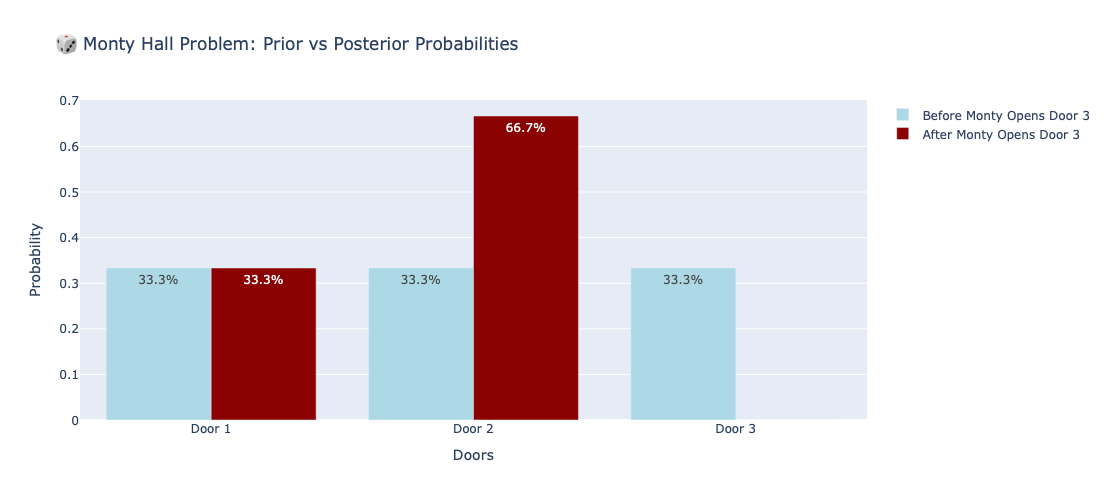

💡 Key Insight: Information changes everything!
   The act of Monty opening a door provides crucial information
   that dramatically shifts our probability estimates.


In [3]:
# Visualize the Monty Hall problem
fig = go.Figure()

doors = ['Door 1', 'Door 2', 'Door 3']
prior_probs = monty_hall_results['prior']
posterior_probs = monty_hall_results['posterior']

# Add prior probabilities
fig.add_trace(go.Bar(
    name='Before Monty Opens Door 3',
    x=doors,
    y=prior_probs,
    marker_color='lightblue',
    text=[f'{p:.1%}' for p in prior_probs],
    textposition='auto'
))

# Add posterior probabilities
fig.add_trace(go.Bar(
    name='After Monty Opens Door 3',
    x=doors,
    y=posterior_probs,
    marker_color='darkred',
    text=[f'{p:.1%}' for p in posterior_probs],
    textposition='auto'
))

fig.update_layout(
    title='🎲 Monty Hall Problem: Prior vs Posterior Probabilities',
    xaxis_title='Doors',
    yaxis_title='Probability',
    barmode='group',
    height=500
)

fig.show()

print("💡 Key Insight: Information changes everything!")
print("   The act of Monty opening a door provides crucial information")
print("   that dramatically shifts our probability estimates.")


## 🎯 Example 2: Simple MCMC - The "Drunkard's Walk" to Find the Peak

### The Problem
How do we find the maximum (or sample from) complex probability distributions when we can't calculate them analytically? This is a fundamental challenge in Bayesian statistics when we have:
- High-dimensional parameter spaces
- Complex posterior distributions
- No closed-form solutions

### Why MCMC Matters
**Markov Chain Monte Carlo (MCMC)** is one of the most important algorithms in modern statistics. It allows us to:
- Sample from any probability distribution (even if we can't integrate it)
- Find peaks in complex landscapes
- Quantify uncertainty in high dimensions
- Make Bayesian inference practical for real problems

### The "Drunkard's Walk" Analogy
Imagine a drunk person trying to find the highest point on a hill:
- They take random steps (proposals)
- If they step uphill, they always take it (accept)
- If they step downhill, they sometimes take it (probabilistic acceptance)
- Over time, they spend more time near the peaks!

This is exactly how Metropolis-Hastings works - it's a random walk that naturally explores high-probability regions.

### Real-World Applications
- **Machine Learning**: Training neural networks, hyperparameter optimization
- **Finance**: Risk modeling, portfolio optimization
- **Biology**: Protein folding, evolutionary modeling
- **Physics**: Quantum mechanics, statistical mechanics
- **Marketing**: Customer segmentation, recommendation systems

### Why This Example is Perfect
We'll use a simple 1D function with multiple peaks to show how MCMC can:
- Explore the entire landscape
- Find all the peaks
- Spend time proportional to the peak height
- Converge to the true distribution


In [4]:
def drunkards_walk_mcmc(target_function, n_steps=1000, step_size=0.5, start_point=0):
    """
    Simple MCMC using Metropolis-Hastings algorithm
    Like a drunk person trying to find the highest point on a hill!
    """
    print(f"🍺 Starting Drunkard's Walk MCMC...")
    print(f"   Target: Find the peak of our function")
    print(f"   Steps: {n_steps}, Step size: {step_size}")
    print()
    
    # Initialize
    current_position = start_point
    samples = [current_position]
    accepted = 0
    
    for step in range(n_steps):
        # Propose a new position (random walk)
        proposed_position = current_position + np.random.normal(0, step_size)
        
        # Calculate acceptance probability
        # Higher function value = more likely to accept
        current_value = target_function(current_position)
        proposed_value = target_function(proposed_position)
        
        # Avoid division by zero
        if current_value > 0:
            alpha = min(1, proposed_value / current_value)
        else:
            alpha = 1 if proposed_value > current_value else 0
        
        # Accept or reject
        if np.random.random() < alpha:
            current_position = proposed_position
            accepted += 1
        
        samples.append(current_position)
        
        # Print progress for first few steps
        if step < 5:
            print(f"Step {step+1}: Current={current_position:.3f}, "
                  f"Value={target_function(current_position):.3f}, "
                  f"Acceptance rate: {accepted/(step+1):.2%}")
    
    acceptance_rate = accepted / n_steps
    print(f"\n🎯 Final Results:")
    print(f"   Acceptance rate: {acceptance_rate:.1%}")
    print(f"   Final position: {current_position:.3f}")
    print(f"   Final value: {target_function(current_position):.3f}")
    
    return np.array(samples), acceptance_rate

# Define a target function (like a hill to climb)
def target_function(x):
    """A function with multiple peaks - like hills to explore"""
    return np.exp(-0.5 * (x - 2)**2) + 0.5 * np.exp(-0.5 * (x + 1)**2)

# Run the drunkard's walk
np.random.seed(42)  # For reproducible results
samples, acceptance_rate = drunkards_walk_mcmc(target_function, n_steps=2000, step_size=0.8)


🍺 Starting Drunkard's Walk MCMC...
   Target: Find the peak of our function
   Steps: 2000, Step size: 0.8

Step 1: Current=0.397, Value=0.465, Acceptance rate: 100.00%
Step 2: Current=0.287, Value=0.449, Acceptance rate: 100.00%
Step 3: Current=0.099, Value=0.438, Acceptance rate: 100.00%
Step 4: Current=-0.088, Value=0.443, Acceptance rate: 100.00%
Step 5: Current=1.175, Value=0.759, Acceptance rate: 100.00%

🎯 Final Results:
   Acceptance rate: 82.8%
   Final position: 2.339
   Final value: 0.946


In [5]:
# Visualize the drunkard's walk
x_range = np.linspace(-4, 5, 1000)
y_range = target_function(x_range)

# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['The "Hill" We Want to Climb', 'MCMC Trace (Drunkard\'s Path)', 
                   'Where We Visited Most', 'Convergence Check'],
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. The target function
fig.add_trace(
    go.Scatter(x=x_range, y=y_range, mode='lines', name='Target Function',
               line=dict(color='blue', width=3)),
    row=1, col=1
)

# 2. MCMC trace
fig.add_trace(
    go.Scatter(x=list(range(len(samples))), y=samples, mode='lines', 
               name='MCMC Path', line=dict(color='red', width=1)),
    row=1, col=2
)

# 3. Histogram of visited positions
fig.add_trace(
    go.Histogram(x=samples, nbinsx=50, name='Visited Positions',
                 marker_color='green', opacity=0.7),
    row=2, col=1
)

# 4. Running average (convergence)
running_avg = np.cumsum(samples) / np.arange(1, len(samples) + 1)
fig.add_trace(
    go.Scatter(x=list(range(len(running_avg))), y=running_avg, 
               mode='lines', name='Running Average',
               line=dict(color='purple', width=2)),
    row=2, col=2
)

fig.update_layout(height=800, title_text="🍺 Drunkard's Walk MCMC Results")
fig.show()

print("🎉 The drunkard found the peaks!")
print(f"   Most visited area: {np.mean(samples):.2f} ± {np.std(samples):.2f}")
print(f"   True peaks are at x = -1 and x = 2")


🎉 The drunkard found the peaks!
   Most visited area: 1.01 ± 1.81
   True peaks are at x = -1 and x = 2


## 🎯 Example 3: Bayesian A/B Testing - Which Website Design is Better?

### The Problem
You're running a website and want to test if a new design increases user engagement. Traditional A/B testing has limitations:
- **Fixed sample sizes**: You have to wait for the full test to complete
- **P-values**: Hard to interpret, don't give direct probability statements
- **No prior knowledge**: Can't incorporate what you already know
- **Multiple testing**: Problems when testing many variants

### Why Bayesian A/B Testing is Superior
Bayesian methods solve these problems by:
- **Flexible stopping**: Stop early when confident, or continue if uncertain
- **Direct probabilities**: "There's a 95% chance B is better than A"
- **Prior knowledge**: Incorporate previous experiments and domain expertise
- **Uncertainty quantification**: Credible intervals show what we don't know
- **Sequential updates**: Update beliefs as new data arrives

### Real-World Impact
This isn't just academic - companies like Google, Netflix, and Amazon use Bayesian A/B testing for:
- **Website Optimization**: Button colors, layouts, copy
- **Product Features**: New functionality, user interfaces
- **Marketing Campaigns**: Email subject lines, ad creatives
- **Pricing Strategies**: Dynamic pricing, subscription models
- **Recommendation Systems**: Algorithm improvements

### The Business Value
- **Faster decisions**: Stop losing money on bad variants
- **Better insights**: Understand not just "which is better" but "by how much"
- **Risk management**: Quantify uncertainty in business decisions
- **Resource efficiency**: Focus testing on promising variants

### Why This Example Matters
We'll show how Bayesian A/B testing gives you:
- **Real-time insights**: Update probabilities as data comes in
- **Business-friendly results**: "95% chance of 3% improvement"
- **Flexible experimentation**: Test multiple variants simultaneously
- **Prior integration**: Use historical data to inform new tests


In [17]:
# Fixed version of the Bayesian A/B test function
def bayesian_ab_test(visitors_a, conversions_a, visitors_b, conversions_b):
    """
    Bayesian A/B test comparing two website designs - FIXED VERSION
    """
    print("🌐 BAYESIAN A/B TESTING")
    print("=" * 40)
    print(f"Design A: {conversions_a}/{visitors_a} conversions ({conversions_a/visitors_a:.1%})")
    print(f"Design B: {conversions_b}/{visitors_b} conversions ({conversions_b/visitors_b:.1%})")
    print()
    
    # Prior: Beta(1,1) - uniform prior (no strong beliefs)
    alpha_prior = 1
    beta_prior = 1
    
    # Posterior for Design A: Beta(1 + conversions_a, 1 + visitors_a - conversions_a)
    alpha_a = alpha_prior + conversions_a
    beta_a = beta_prior + visitors_a - conversions_a
    
    # Posterior for Design B: Beta(1 + conversions_b, 1 + visitors_b - conversions_b)
    alpha_b = alpha_prior + conversions_b
    beta_b = beta_prior + visitors_b - conversions_b
    
    # Calculate posterior means
    mean_a = alpha_a / (alpha_a + beta_a)
    mean_b = alpha_b / (alpha_b + beta_b)
    
    print(f"Posterior conversion rates:")
    print(f"Design A: {mean_a:.3f} (95% credible interval: {stats.beta.ppf(0.025, alpha_a, beta_a):.3f} - {stats.beta.ppf(0.975, alpha_a, beta_a):.3f})")
    print(f"Design B: {mean_b:.3f} (95% credible interval: {stats.beta.ppf(0.025, alpha_b, beta_b):.3f} - {stats.beta.ppf(0.975, alpha_b, beta_b):.3f})")
    print()
    
    # Calculate probability that B is better than A
    # P(B > A) = integral over all possible values
    n_samples = 10000
    samples_a = np.random.beta(alpha_a, beta_a, n_samples)
    samples_b = np.random.beta(alpha_b, beta_b, n_samples)
    
    prob_b_better = np.mean(samples_b > samples_a)
    
    print(f"🎯 Probability that Design B is better: {prob_b_better:.1%}")
    
    if prob_b_better > 0.95:
        print("✅ Strong evidence for Design B!")
    elif prob_b_better > 0.8:
        print("📈 Moderate evidence for Design B")
    elif prob_b_better < 0.05:
        print("✅ Strong evidence for Design A!")
    elif prob_b_better < 0.2:
        print("📈 Moderate evidence for Design A")
    else:
        print("❓ Inconclusive - need more data!")
    
    return {
        'alpha_a': alpha_a, 'beta_a': beta_a,
        'alpha_b': alpha_b, 'beta_b': beta_b,
        'prob_b_better': prob_b_better,
        'samples_a': samples_a,
        'samples_b': samples_b
    }

# Run the fixed version
ab_results = bayesian_ab_test(visitors_a, conversions_a, visitors_b, conversions_b)


🌐 BAYESIAN A/B TESTING
Design A: 120/1000 conversions (12.0%)
Design B: 150/1000 conversions (15.0%)

Posterior conversion rates:
Design A: 0.121 (95% credible interval: 0.101 - 0.142)
Design B: 0.151 (95% credible interval: 0.129 - 0.173)

🎯 Probability that Design B is better: 97.5%
✅ Strong evidence for Design B!


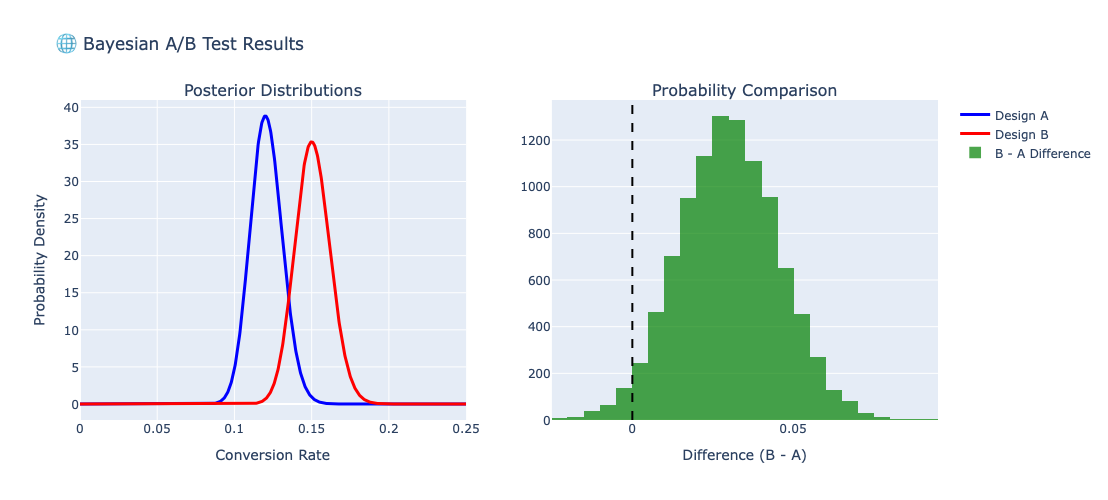

💡 Key Insights:
   • We can quantify uncertainty with credible intervals
   • We get direct probability statements (not p-values!)
   • We can stop the test early if we're confident
   • We can incorporate prior knowledge easily


In [18]:
# Visualize the A/B test results
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=['Posterior Distributions', 'Probability Comparison'],
    specs=[[{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Posterior distributions
x_range = np.linspace(0, 0.25, 1000)
pdf_a = stats.beta.pdf(x_range, ab_results['alpha_a'], ab_results['beta_a'])
pdf_b = stats.beta.pdf(x_range, ab_results['alpha_b'], ab_results['beta_b'])

fig.add_trace(
    go.Scatter(x=x_range, y=pdf_a, mode='lines', name='Design A',
               line=dict(color='blue', width=3)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_range, y=pdf_b, mode='lines', name='Design B',
               line=dict(color='red', width=3)),
    row=1, col=1
)

# 2. Difference distribution
diff_samples = ab_results['samples_b'] - ab_results['samples_a']
fig.add_trace(
    go.Histogram(x=diff_samples, nbinsx=50, name='B - A Difference',
                 marker_color='green', opacity=0.7),
    row=1, col=2
)

# Add vertical line at 0
fig.add_vline(x=0, line_dash="dash", line_color="black", row=1, col=2)

fig.update_layout(
    height=500,
    title_text="🌐 Bayesian A/B Test Results",
    xaxis_title="Conversion Rate",
    yaxis_title="Probability Density"
)

fig.update_xaxes(title_text="Conversion Rate", row=1, col=1)
fig.update_xaxes(title_text="Difference (B - A)", row=1, col=2)

fig.show()

print("💡 Key Insights:")
print(f"   • We can quantify uncertainty with credible intervals")
print(f"   • We get direct probability statements (not p-values!)")
print(f"   • We can stop the test early if we're confident")
print(f"   • We can incorporate prior knowledge easily")


## 🎉 Summary: What We've Learned

These examples demonstrate the power and practicality of Bayesian thinking across different domains:

### 🎲 **Monty Hall Problem**
- **Core Concept**: How new information should update our beliefs
- **Key Insight**: Information changes everything - even when it seems counterintuitive
- **Real Impact**: Medical diagnosis, legal evidence, quality control
- **Bayesian Advantage**: Quantifies exactly how much our beliefs should change

### 🍺 **Drunkard's Walk MCMC**
- **Core Concept**: How to explore complex probability landscapes
- **Key Insight**: Random walks naturally find high-probability regions
- **Real Impact**: Machine learning, finance, biology, physics
- **Bayesian Advantage**: Makes complex Bayesian inference computationally feasible

### 🌐 **Bayesian A/B Testing**
- **Core Concept**: How to make decisions with uncertainty
- **Key Insight**: Direct probability statements are more useful than p-values
- **Real Impact**: Website optimization, product development, marketing
- **Bayesian Advantage**: Flexible, interpretable, incorporates prior knowledge

### 🚀 **Key Bayesian Advantages**
- **Intuitive Results**: "There's a 95% chance B is better" vs "p < 0.05"
- **Flexible Framework**: Easy to incorporate prior knowledge and domain expertise
- **Uncertainty Quantification**: Credible intervals show what we don't know
- **Sequential Learning**: Update beliefs as new data arrives
- **Business Friendly**: Results that stakeholders can understand and act on

### 🎯 **Why This Matters**
Bayesian methods aren't just academic exercises - they're practical tools for:
- **Better Decision Making**: Quantify uncertainty in business and scientific decisions
- **Faster Innovation**: Stop bad ideas early, accelerate good ones
- **Risk Management**: Understand and communicate uncertainty
- **Resource Optimization**: Focus effort where it matters most

### 🔬 **Next Steps for Exploration**
- **MCMC Tuning**: Try different step sizes and proposal distributions
- **Prior Sensitivity**: Experiment with different priors in the A/B test
- **Problem Extensions**: Add more doors to Monty Hall, test multiple variants
- **Advanced Topics**: Hierarchical models, model comparison, causal inference
- **Real Data**: Apply these methods to your own datasets and problems

### 💡 **The Big Picture**
Bayesian thinking is fundamentally about **learning from data while acknowledging uncertainty**. It's not just a statistical method - it's a framework for rational decision-making in an uncertain world. Whether you're optimizing a website, diagnosing a patient, or exploring the universe, Bayesian methods help you make better decisions with the information you have.
